In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from scipy.stats import zscore

import matplotlib.pyplot as plt   
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

from imblearn.over_sampling import SMOTE 
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("Laptop Dataset.csv")
df1.head().T

,0,1,2,3,4
Taken_product,0,0,0,0,1
Yearly_avg_view_on_travel_page,379.0,255.0,250.0,295.0,250.0
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776.0,48725.0,35184.0,7572.0,39379.0
yearly_avg_Outstation_checkins,8.0,3.0,2.0,23.0,16.0
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64.0,59.0,84.0,48.0,80.0
total_likes_on_outofstation_checkin_received,5142.0,2913.0,3074.0,9532.0,3926.0
week_since_last_outstation_checkin,1.0,1.0,0.0,0.0,1.0


In [3]:
df1.shape

(1108, 16)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   float64
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   object 
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 9   week_since_last_outstation_checkin            1108 non-null   f

In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,1108.0,0.249097,0.432686,0.0,0.00,0.0,0.00,1.0
Yearly_avg_view_on_travel_page,1108.0,282.115523,64.199977,138.0,237.00,270.5,325.00,455.5
total_likes_on_outstation_checkin_given,1108.0,27769.664260,13361.837042,3818.0,17650.25,26942.5,39380.25,52512.0
yearly_avg_Outstation_checkins,1108.0,9.277978,8.409913,1.0,2.00,7.0,15.00,29.0
member_in_family,1108.0,2.895307,1.044561,1.0,2.00,3.0,4.00,5.0
Yearly_avg_comment_on_travel_page,1108.0,77.496390,21.039323,33.0,60.00,77.0,95.00,125.0
total_likes_on_outofstation_checkin_received,1108.0,6130.675090,4105.791059,1098.0,2884.00,4759.5,7979.50,16572.0
week_since_last_outstation_checkin,1108.0,2.998195,2.493351,0.0,1.00,2.0,4.00,11.0
following_company_page,1108.0,0.310469,0.462895,0.0,0.00,0.0,1.00,1.0
montly_avg_comment_on_company_page,1108.0,26.391697,6.167198,14.0,22.00,26.0,31.00,42.0


In [6]:
df1.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [7]:
df1c=df1.copy()
df1c

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776.0,8.0,1,Beach,64.0,5142.0,1.0,0,33.0,1,4.0,1,10.0
1,0,255.0,Laptop,48725.0,3.0,4,Beach,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,0,250.0,Laptop,35184.0,2.0,2,Beach,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,0,295.0,Laptop,7572.0,23.0,3,Beach,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,1,250.0,Laptop,39379.0,16.0,1,Beach,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0,278.0,Laptop,24127.0,4.0,2,Beach,115.0,5184.0,7.0,0,35.0,0,2.0,1,23.0
1104,1,388.0,Laptop,30775.0,1.0,4,Beach,109.0,6787.0,8.0,0,29.0,0,4.0,1,14.0
1105,0,268.0,Laptop,42010.0,18.0,4,Beach,98.0,5753.0,2.0,1,34.0,0,4.0,1,17.0
1106,0,279.0,Laptop,30987.0,23.0,2,Historical site,58.0,2616.0,4.0,0,36.0,0,3.0,1,23.0


In [8]:
df1c['preferred_location_type'].value_counts()

Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: preferred_location_type, dtype: int64

In [9]:
print('Feature: Preferred location type')
print(pd.Categorical(df1c['preferred_location_type'].unique()))
print(pd.Categorical(df1c['preferred_location_type'].unique()).codes)
df1c['preferred_location_type'] = pd.Categorical(df1c['preferred_location_type']).codes

Feature: Preferred location type
['Beach', 'Historical site', 'Big Cities', 'Trekking', 'Other', 'Hill Stations']
Categories (6, object): ['Beach', 'Big Cities', 'Hill Stations', 'Historical site', 'Other', 'Trekking']
[0 3 1 5 4 2]


In [10]:
df1c['preferred_location_type'].value_counts()

0    492
3    344
1    108
5     84
4     56
2     24
Name: preferred_location_type, dtype: int64

In [11]:
df_laptop = df1c.copy()
df_laptop.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776.0,8.0,1,0,64.0,5142.0,1.0,0,33.0,1,4.0,1,10.0
1,0,255.0,Laptop,48725.0,3.0,4,0,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,0,250.0,Laptop,35184.0,2.0,2,0,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,0,295.0,Laptop,7572.0,23.0,3,0,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,1,250.0,Laptop,39379.0,16.0,1,0,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0


In [12]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int64  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   preferred_device                              1108 non-null   object 
 3   total_likes_on_outstation_checkin_given       1108 non-null   float64
 4   yearly_avg_Outstation_checkins                1108 non-null   float64
 5   member_in_family                              1108 non-null   int64  
 6   preferred_location_type                       1108 non-null   int8   
 7   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 8   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 9   week_since_last_outstation_checkin            1108 non-null   f

In [13]:
df_laptop.shape

(1108, 16)

In [14]:
df_laptop

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,0,379.0,Laptop,9776.0,8.0,1,0,64.0,5142.0,1.0,0,33.0,1,4.0,1,10.0
1,0,255.0,Laptop,48725.0,3.0,4,0,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,0,250.0,Laptop,35184.0,2.0,2,0,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,0,295.0,Laptop,7572.0,23.0,3,0,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,1,250.0,Laptop,39379.0,16.0,1,0,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,0,278.0,Laptop,24127.0,4.0,2,0,115.0,5184.0,7.0,0,35.0,0,2.0,1,23.0
1104,1,388.0,Laptop,30775.0,1.0,4,0,109.0,6787.0,8.0,0,29.0,0,4.0,1,14.0
1105,0,268.0,Laptop,42010.0,18.0,4,0,98.0,5753.0,2.0,1,34.0,0,4.0,1,17.0
1106,0,279.0,Laptop,30987.0,23.0,2,3,58.0,2616.0,4.0,0,36.0,0,3.0,1,23.0


In [15]:
df_laptop['preferred_device']=df_laptop['preferred_device'].replace({'Laptop':1})
df_laptop['preferred_device'].value_counts()

1    1108
Name: preferred_device, dtype: int64

In [16]:
X= df_laptop.drop(["Taken_product"],axis=1)
y=df_laptop.Taken_product
X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,379.0,1,9776.0,8.0,1,0,64.0,5142.0,1.0,0,33.0,1,4.0,1,10.0
1,255.0,1,48725.0,3.0,4,0,59.0,2913.0,1.0,1,19.0,0,3.0,0,8.0
2,250.0,1,35184.0,2.0,2,0,84.0,3074.0,0.0,0,23.0,0,3.0,0,8.0
3,295.0,1,7572.0,23.0,3,0,48.0,9532.0,0.0,0,33.0,1,2.0,0,10.0
4,250.0,1,39379.0,16.0,1,0,80.0,3926.0,1.0,1,33.0,1,2.0,0,10.0


In [17]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Taken_product, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [19]:
X_train.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
667,328.0,1,20006.0,8.0,3,0,81.0,16572.0,2.0,0,26.0,0,2.0,1,33.0
737,281.0,1,21306.0,7.0,3,1,96.0,4691.0,3.0,0,35.0,0,4.0,1,21.0
820,246.0,1,26433.0,26.0,4,1,86.0,5685.0,3.0,1,32.0,0,3.0,0,17.0
385,365.0,1,25177.0,27.0,2,0,85.0,6404.0,4.0,1,24.0,0,4.0,0,8.0
785,370.0,1,24832.0,7.0,2,3,113.0,2718.0,4.0,1,23.0,0,3.0,1,26.0


In [20]:
y_train.head()

667    0
737    0
820    1
385    1
785    1
Name: Taken_product, dtype: int64

In [21]:
X_test.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
304,245.0,1,24120.0,9.0,2,3,47.0,4675.0,0.0,0,20.0,0,4.0,1,9.0
1072,297.0,1,20838.0,2.0,2,3,95.0,2538.0,5.0,0,22.0,0,2.0,1,16.0
126,202.0,1,44910.0,1.0,3,3,57.0,4304.0,1.0,0,24.0,0,2.0,0,7.0
976,267.0,1,21684.0,3.0,1,0,53.0,7818.0,1.0,0,26.0,0,3.0,0,14.0
236,239.0,1,5714.0,24.0,1,5,40.0,5245.0,2.0,0,30.0,1,4.0,0,9.0


In [22]:
y_test.head()

304     0
1072    0
126     0
976     0
236     0
Name: Taken_product, dtype: int64

In [23]:
X_train.shape

(775, 15)

In [24]:
y_train.shape

(775,)

In [25]:
X_test.shape

(333, 15)

In [26]:
y_test.shape

(333,)

In [27]:
#CART
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [28]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [29]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=ld_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
ld_Tree_File.close()

In [30]:
print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.198488
total_likes_on_outstation_checkin_given       0.163370
total_likes_on_outofstation_checkin_received  0.141064
yearly_avg_Outstation_checkins                0.088027
week_since_last_outstation_checkin            0.072057
Yearly_avg_comment_on_travel_page             0.063596
following_company_page                        0.059435
Daily_Avg_mins_spend_on_traveling_page        0.056775
working_flag                                  0.036617
travelling_network_rating                     0.033307
montly_avg_comment_on_company_page            0.023914
preferred_location_type                       0.023266
Adult_flag                                    0.021736
member_in_family                              0.018349
preferred_device                              0.000000


In [31]:
y_predict = dt_model.predict(X_test)
y_predict.shape

(333,)

In [32]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [33]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,

In [34]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [35]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


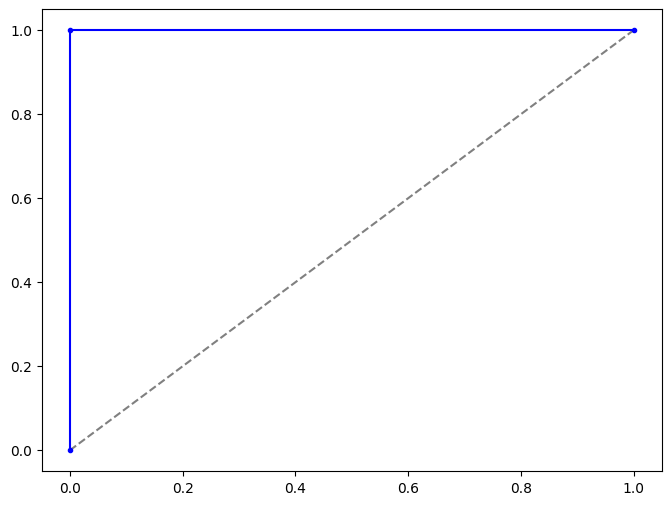

In [36]:
#predict probabilities
probs = dt_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.', color='blue')
plt.show()

AUC: 0.914


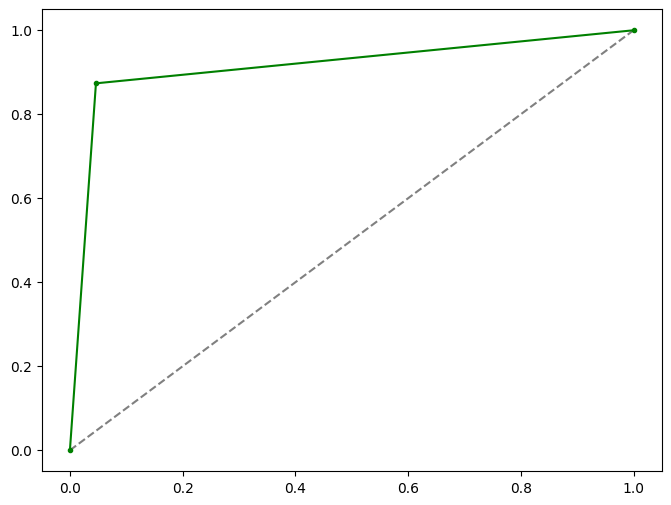

In [37]:
#predict probabilities
probs = dt_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.', color='green')
plt.show()

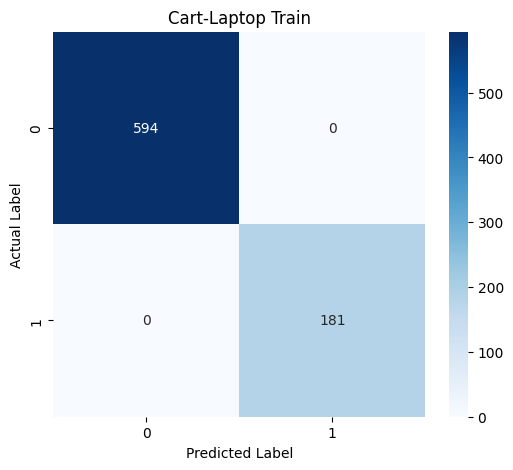

In [38]:
confusion_matrix(y_train, ytrain_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Laptop Train')
plt.show()

In [39]:
#Train Data Accuracy
dt_model.score(X_train,y_train)

1.0

In [40]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



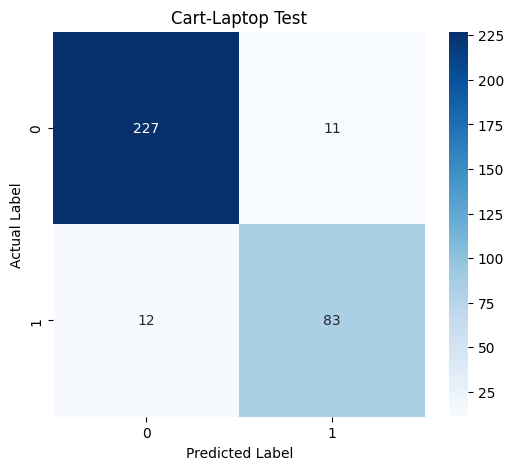

In [41]:
confusion_matrix(y_test, ytest_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Laptop Test')
plt.show()

In [42]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9309309309309309

In [43]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       238
           1       0.88      0.87      0.88        95

    accuracy                           0.93       333
   macro avg       0.92      0.91      0.92       333
weighted avg       0.93      0.93      0.93       333



In [44]:
#Tuning
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [45]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
ld_tree_regularized.close()
dot_data

In [46]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.392451
total_likes_on_outofstation_checkin_received  0.292289
following_company_page                        0.157448
yearly_avg_Outstation_checkins                0.095914
member_in_family                              0.027941
total_likes_on_outstation_checkin_given       0.025798
Yearly_avg_comment_on_travel_page             0.008159
preferred_device                              0.000000
preferred_location_type                       0.000000
week_since_last_outstation_checkin            0.000000
montly_avg_comment_on_company_page            0.000000
working_flag                                  0.000000
travelling_network_rating                     0.000000
Adult_flag                                    0.000000
Daily_Avg_mins_spend_on_traveling_page        0.000000


In [47]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [48]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [49]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [50]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


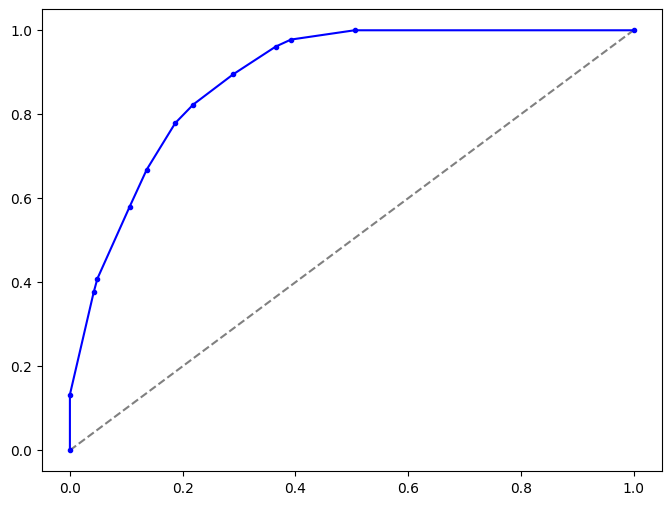

In [51]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.', color='blue')
plt.show()

AUC: 0.881


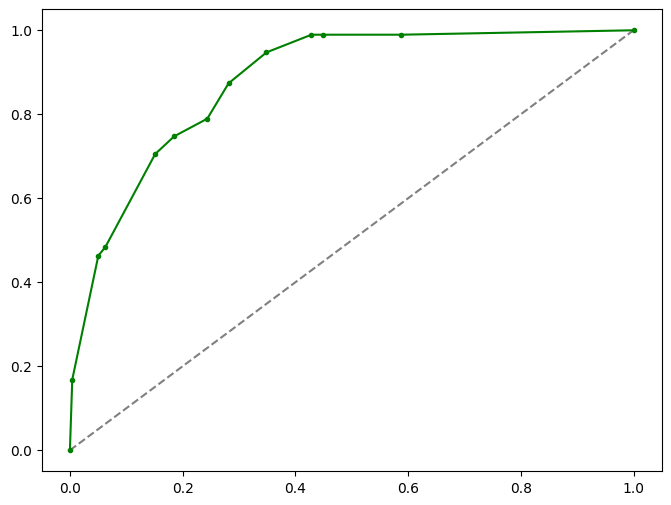

In [52]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.', color='green')
plt.show()

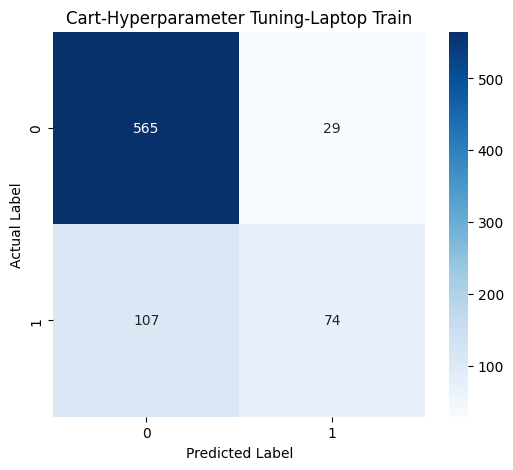

In [53]:
confusion_matrix(y_train, ytrain_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Hyperparameter Tuning-Laptop Train')
plt.show()

In [54]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [55]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



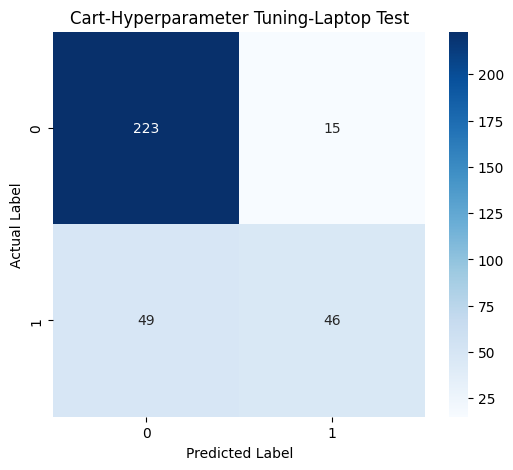

In [56]:
confusion_matrix(y_test, ytest_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Cart-Hyperparameter Tuning-Laptop Test')
plt.show()

In [57]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [58]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



In [59]:
#SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1188, 15)

In [60]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [61]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [62]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [63]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [64]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


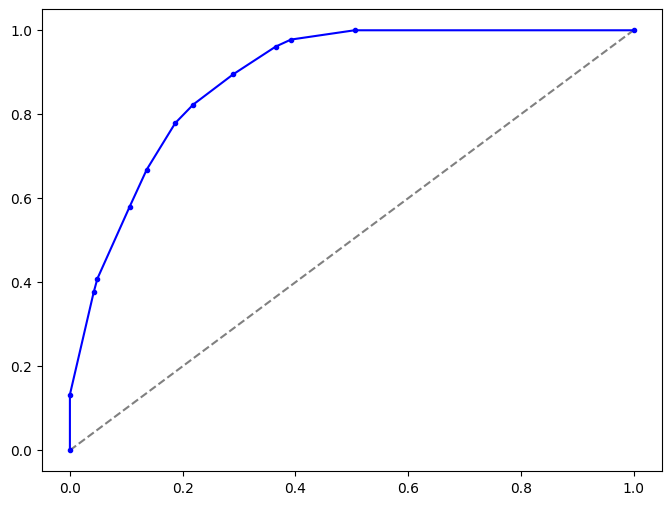

In [65]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.', color='blue')
plt.show()

AUC: 0.881


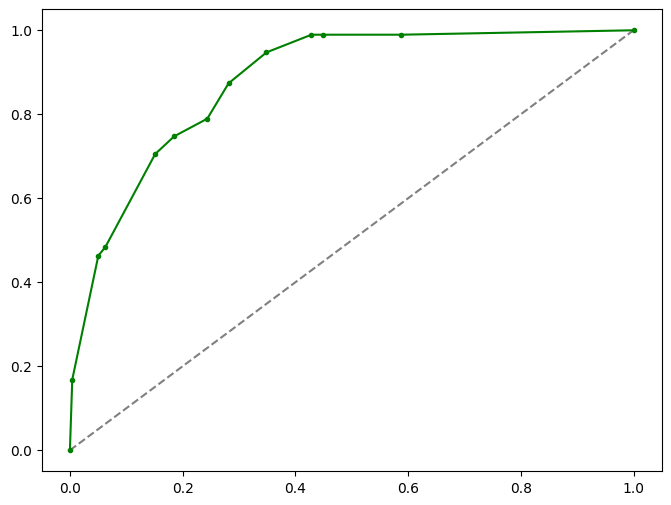

In [66]:
#predict probabilities
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#plot ROC curve for the model
plt.plot(fpr, tpr, marker='.', color='green')
plt.show()

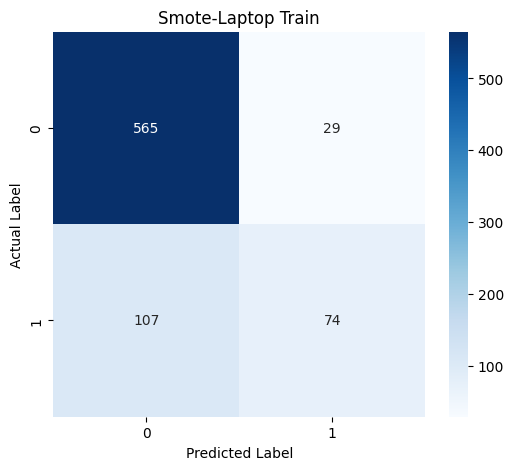

In [67]:
confusion_matrix(y_train, ytrain_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Smote-Laptop Train')
plt.show()

In [68]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [69]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



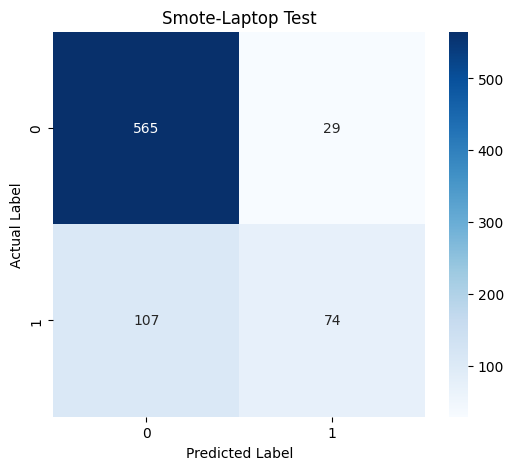

In [70]:
confusion_matrix(y_test, ytest_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Smote-Laptop Test')
plt.show()

In [71]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [72]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



In [73]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [74]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)
log_model.score(X_train,y_train)

0.7974193548387096

In [75]:
log_model.score(X_test,y_test)

0.7447447447447447

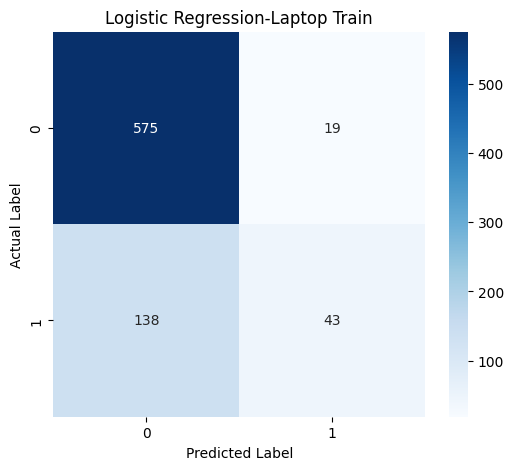

In [76]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Laptop Train')
plt.show()

In [77]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       594
           1       0.69      0.24      0.35       181

    accuracy                           0.80       775
   macro avg       0.75      0.60      0.62       775
weighted avg       0.78      0.80      0.76       775



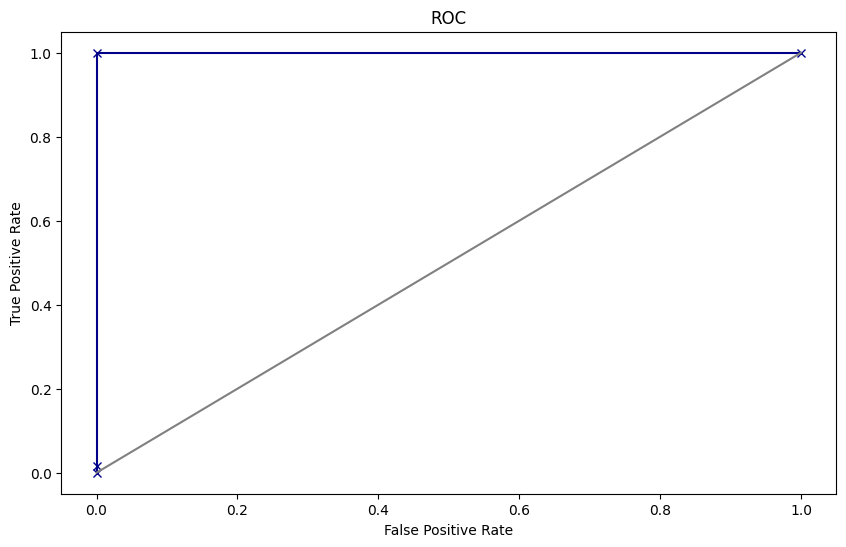

Area under Curve is 1.0


In [78]:
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit', color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

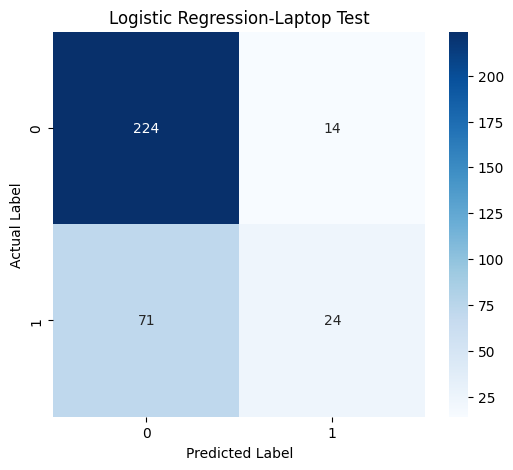

In [79]:
#Confusion Matrix for Train set
confusion_matrix(y_test,log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Laptop Test')
plt.show()

In [80]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       238
           1       0.63      0.25      0.36        95

    accuracy                           0.74       333
   macro avg       0.70      0.60      0.60       333
weighted avg       0.72      0.74      0.70       333



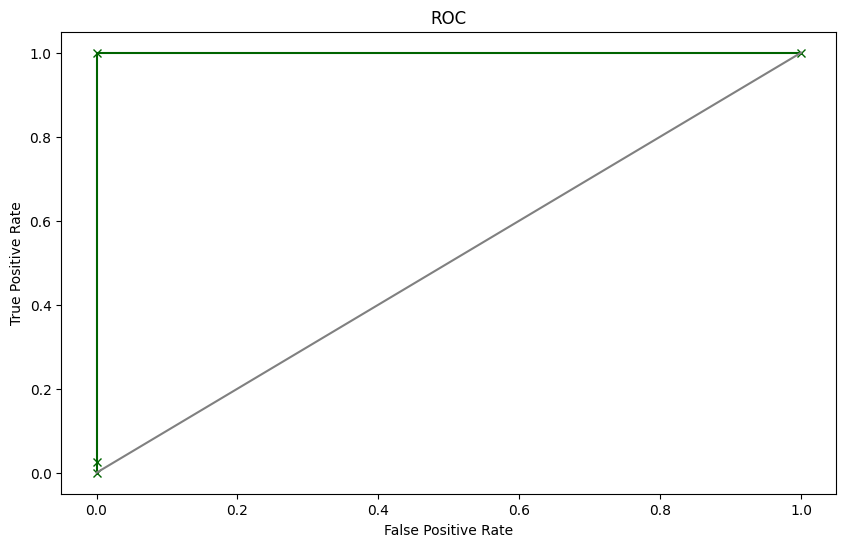

Area under Curve is 1.0


In [81]:
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [82]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],'tol':[0.0001,0.00001]}
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [83]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(penalty='l1', solver='liblinear')


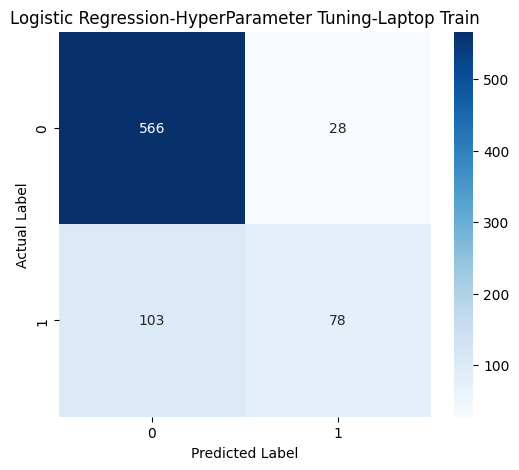

In [84]:
best_model1 = grid_search1.best_estimator_
log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-HyperParameter Tuning-Laptop Train')
plt.show()

In [85]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       594
           1       0.74      0.43      0.54       181

    accuracy                           0.83       775
   macro avg       0.79      0.69      0.72       775
weighted avg       0.82      0.83      0.81       775



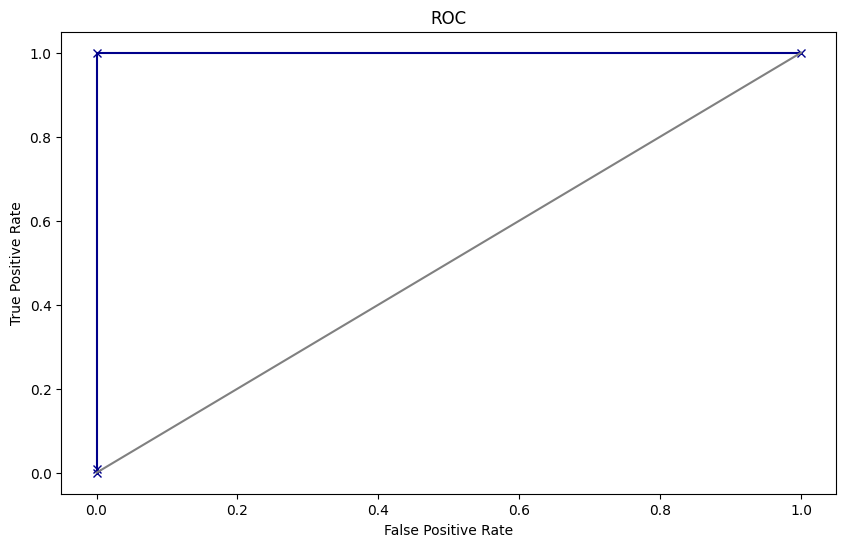

Area under Curve is 1.0


In [86]:
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

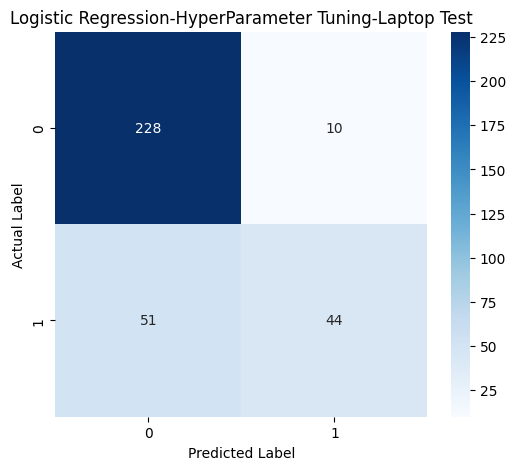

In [87]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-HyperParameter Tuning-Laptop Test')
plt.show()

In [88]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.82      0.96      0.88       238
           1       0.81      0.46      0.59        95

    accuracy                           0.82       333
   macro avg       0.82      0.71      0.74       333
weighted avg       0.82      0.82      0.80       333



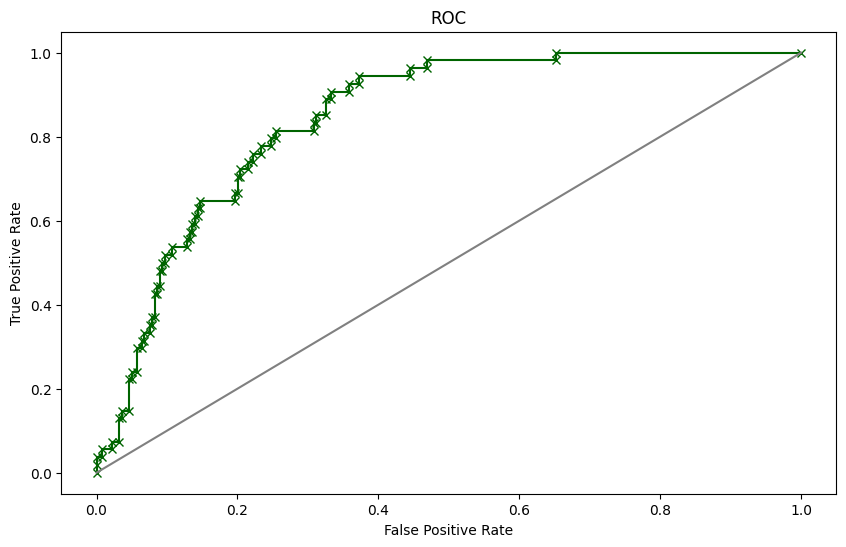

Area under Curve is 0.8449488915438736


In [89]:
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00291
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.05256
Feature: 4, Score: 0.02779
Feature: 5, Score: -0.11606
Feature: 6, Score: 0.01467
Feature: 7, Score: -0.00015
Feature: 8, Score: 0.21096
Feature: 9, Score: 1.47014
Feature: 10, Score: 0.02766
Feature: 11, Score: -0.21786
Feature: 12, Score: -0.32736
Feature: 13, Score: -0.91618
Feature: 14, Score: -0.08597


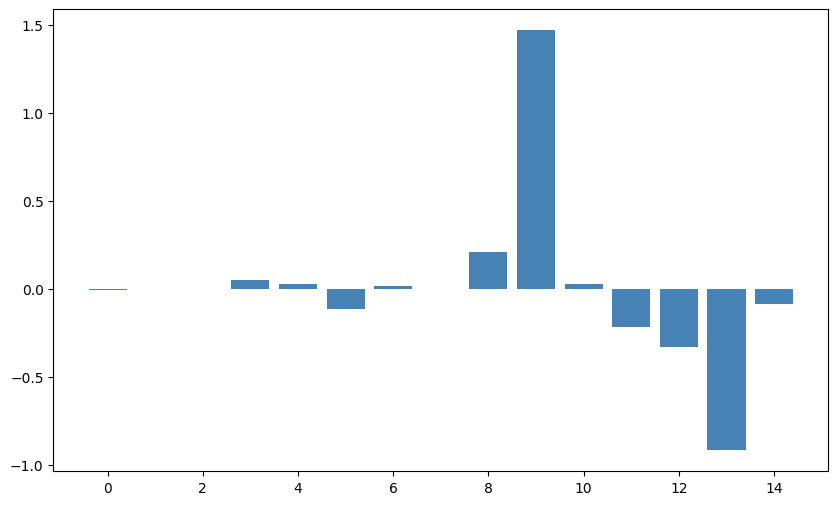

In [90]:
#get importance
importance = best_model1.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,6))  
plt.bar([x for x in range(len(importance))], importance, color='steelblue')
plt.show()

In [91]:
#Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [92]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)
lda_model.score(X_train,y_train)

0.8283870967741935

In [93]:
lda_model.score(X_test,y_test)

0.8108108108108109

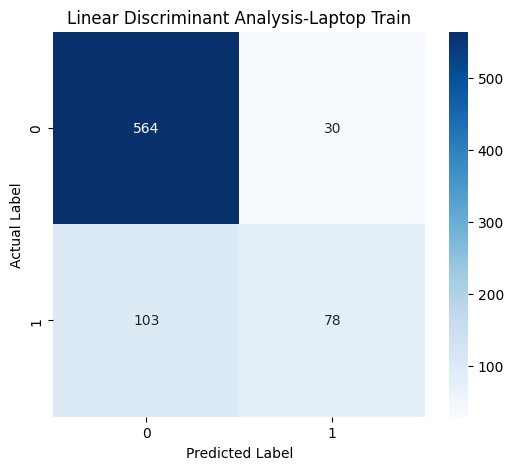

In [94]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Laptop Train')
plt.show()

In [95]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       594
           1       0.72      0.43      0.54       181

    accuracy                           0.83       775
   macro avg       0.78      0.69      0.72       775
weighted avg       0.82      0.83      0.81       775



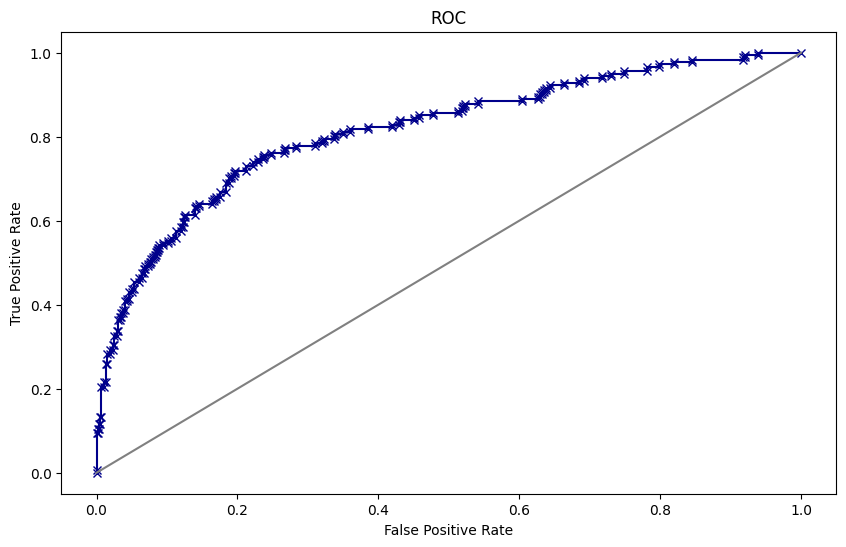

Area under Curve is 0.8153542794426772


In [96]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

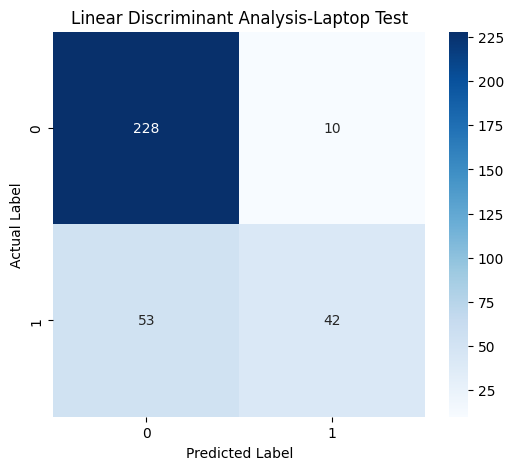

In [97]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Laptop Test')
plt.show()

In [98]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.81      0.44      0.57        95

    accuracy                           0.81       333
   macro avg       0.81      0.70      0.73       333
weighted avg       0.81      0.81      0.79       333



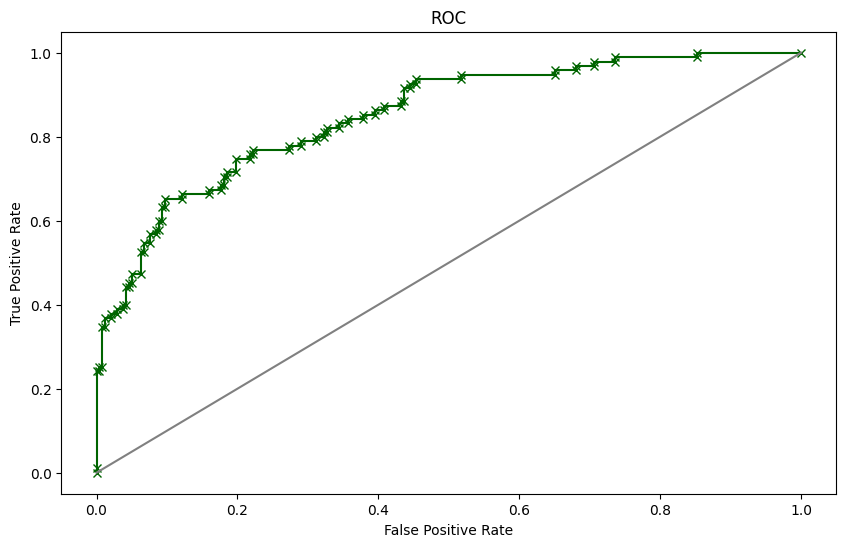

Area under Curve is 0.8518796992481202


In [99]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [100]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],'shrinkage':['auto', 'float','none'],'tol':[0.001,0.0001,0.00001]}
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [101]:
lda_model.score(X_test,y_test)

0.8108108108108109

In [102]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


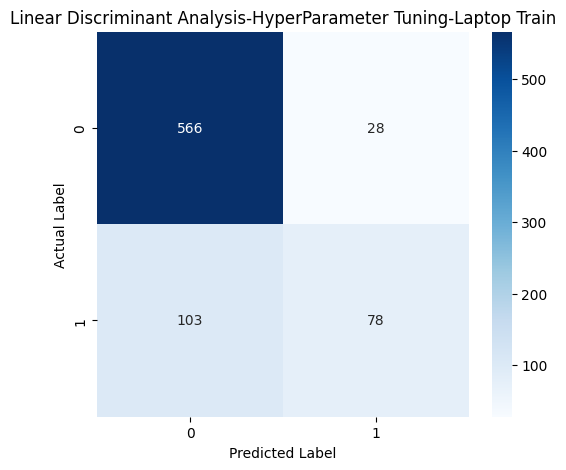

In [103]:
best_model2 = grid_search2.best_estimator_
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-HyperParameter Tuning-Laptop Train')
plt.show()

In [104]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       594
           1       0.74      0.43      0.54       181

    accuracy                           0.83       775
   macro avg       0.79      0.69      0.72       775
weighted avg       0.82      0.83      0.81       775



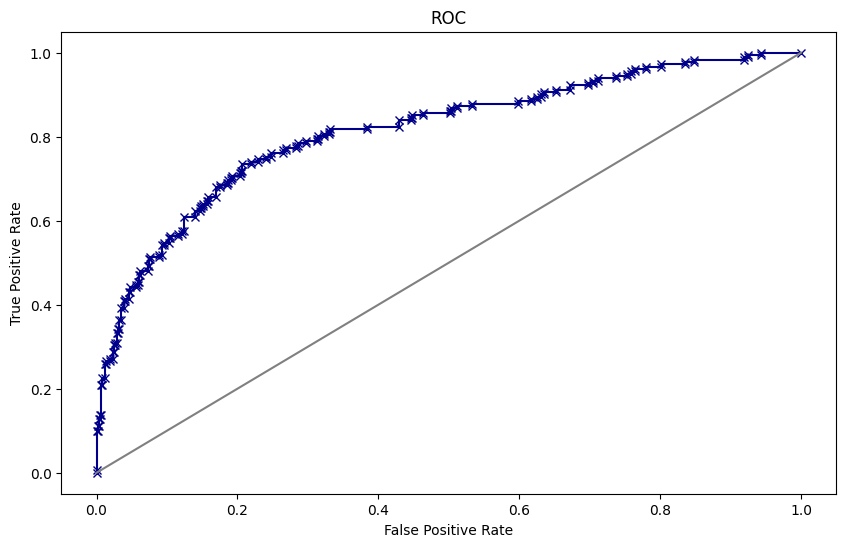

Area under Curve is 0.8147776103577209


In [105]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_model2.predict_proba(X_train)[:,1]))

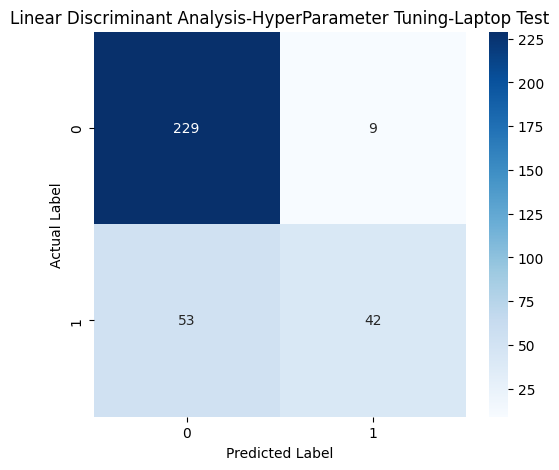

In [106]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-HyperParameter Tuning-Laptop Test')
plt.show()

In [107]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.82      0.44      0.58        95

    accuracy                           0.81       333
   macro avg       0.82      0.70      0.73       333
weighted avg       0.82      0.81      0.79       333



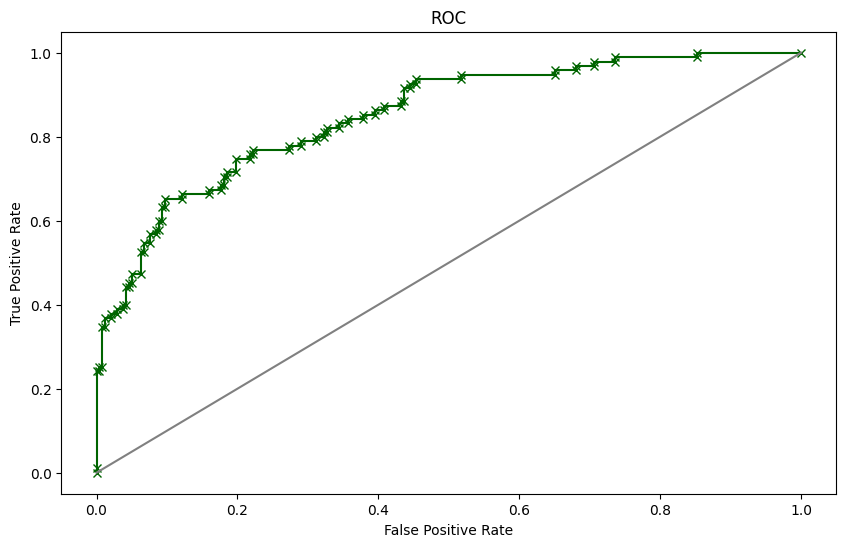

Area under Curve is 0.8518796992481202


In [108]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00404
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.04377
Feature: 4, Score: 0.00324
Feature: 5, Score: -0.11833
Feature: 6, Score: 0.01251
Feature: 7, Score: -0.00011
Feature: 8, Score: 0.19198
Feature: 9, Score: 1.67704
Feature: 10, Score: 0.02635
Feature: 11, Score: -0.12324
Feature: 12, Score: -0.31677
Feature: 13, Score: -0.95264
Feature: 14, Score: -0.06870


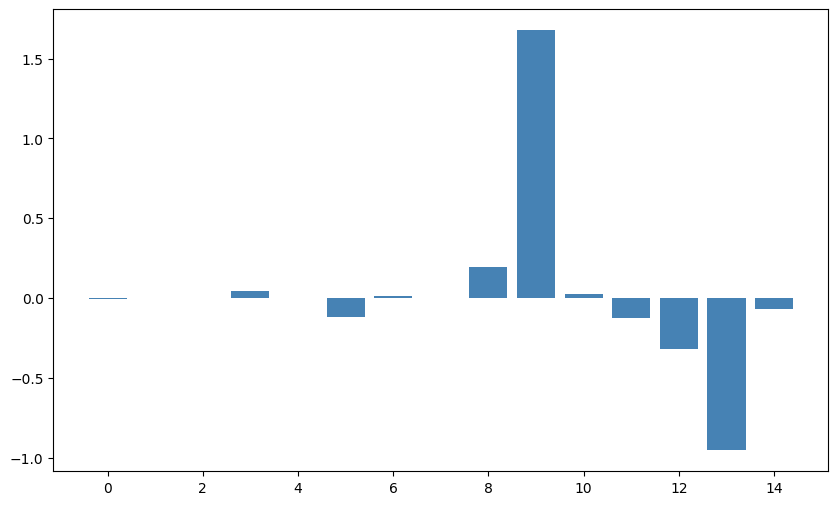

In [109]:
#get importance
importance = best_model2.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance, color='steelblue') 
plt.show()

In [110]:
#Random Forest
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [111]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9819819819819819


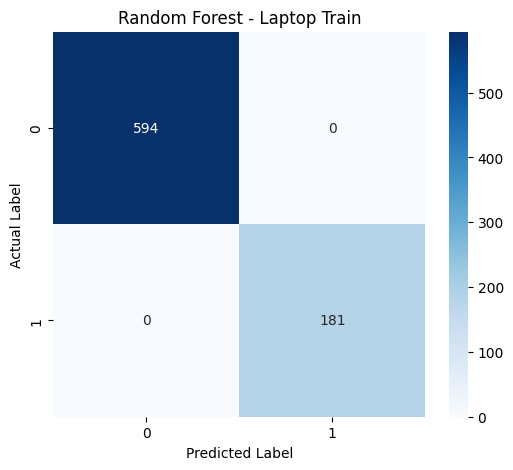

In [112]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest - Laptop Train')
plt.show()

In [113]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



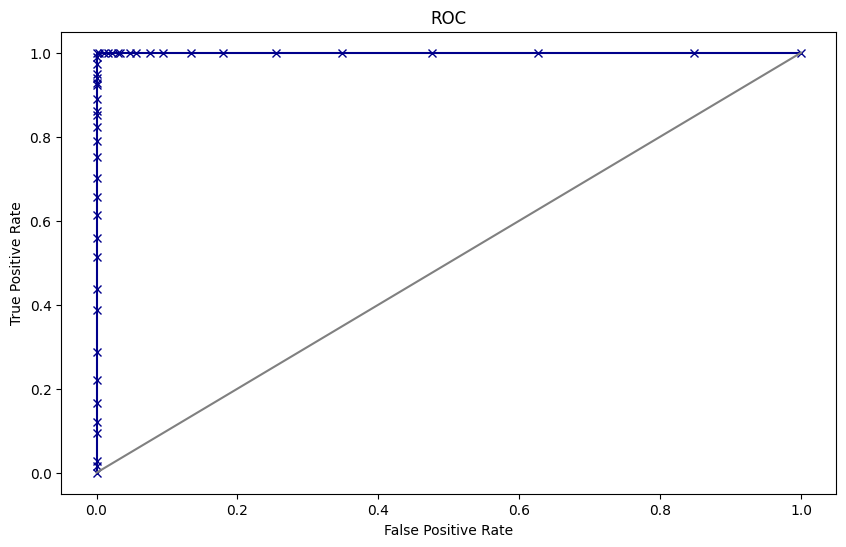

Area under Curve is 1.0


In [114]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

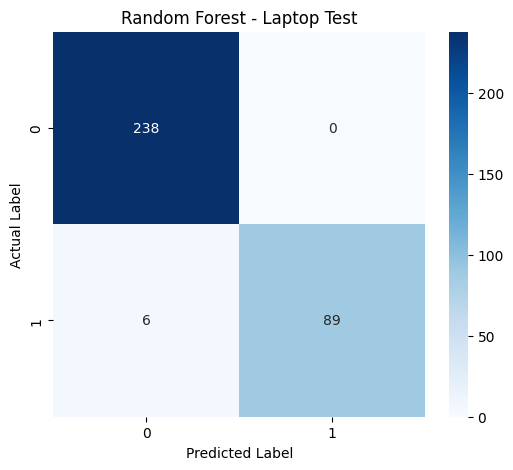

In [115]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest - Laptop Test')
plt.show()

In [116]:
print(classification_report(y_test,RF_test_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



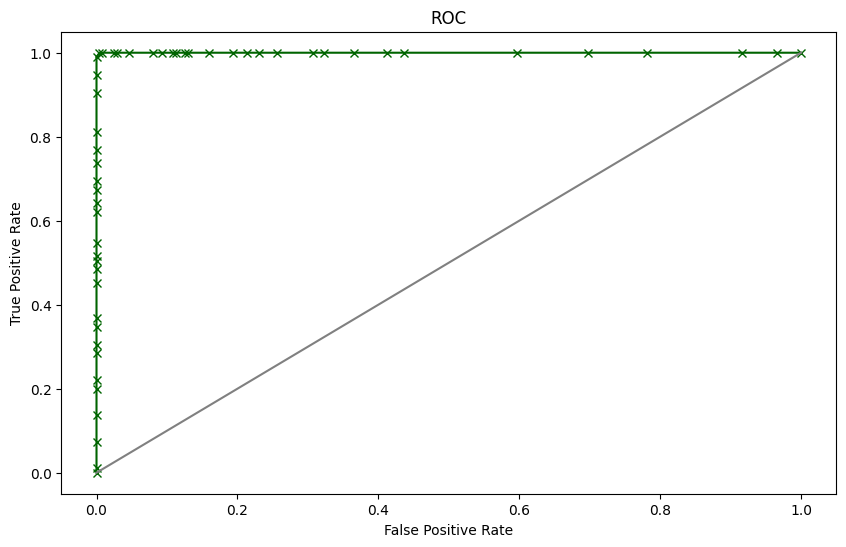

Area under Curve is 0.9999778858911985


In [117]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [118]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [119]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9819819819819819


In [120]:
#RF using grid search
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [121]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [122]:
#Use the random grid to search for best hyperparameters,first create the base model to tune
rf = RandomForestClassifier()
#Random search of parameters,using 3 fold cross validation and search across 100 different combinations and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [123]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [124]:
best_grid = rf_random.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='auto',
                       n_estimators=1800)

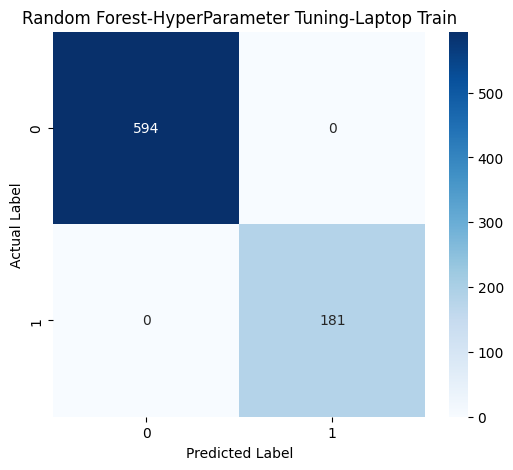

In [125]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)
confusion_matrix(y_train,RF_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-HyperParameter Tuning-Laptop Train')
plt.show()

In [126]:
print(classification_report(y_train,RF_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



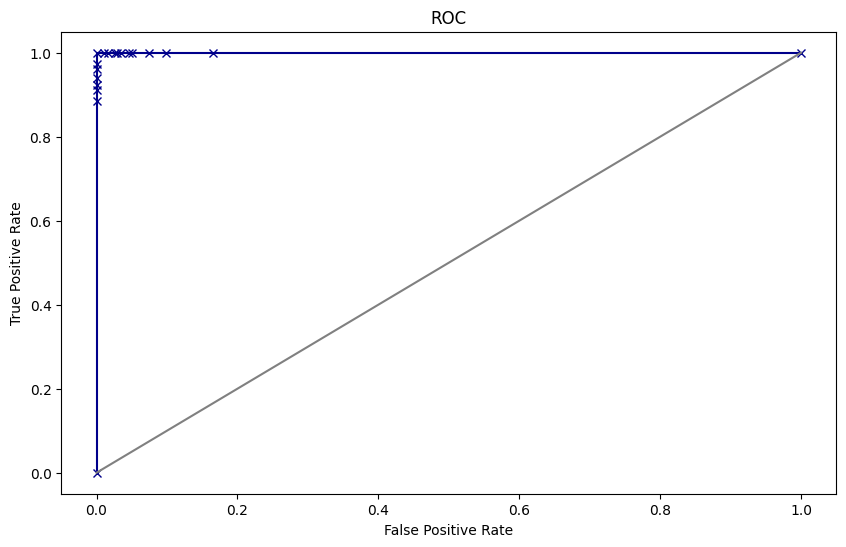

Area under Curve is 1.0


In [127]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

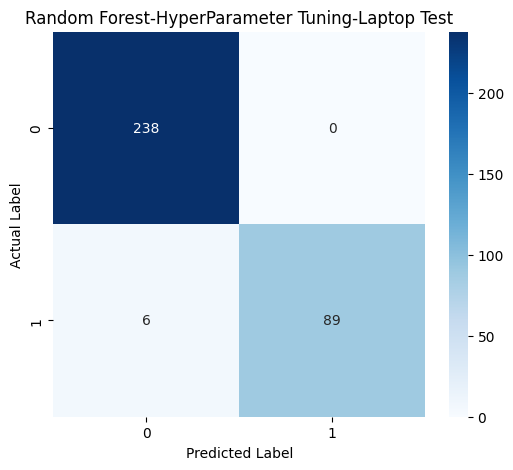

In [128]:
confusion_matrix(y_test,RF_test_predict)
plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-HyperParameter Tuning-Laptop Test')
plt.show()

In [129]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



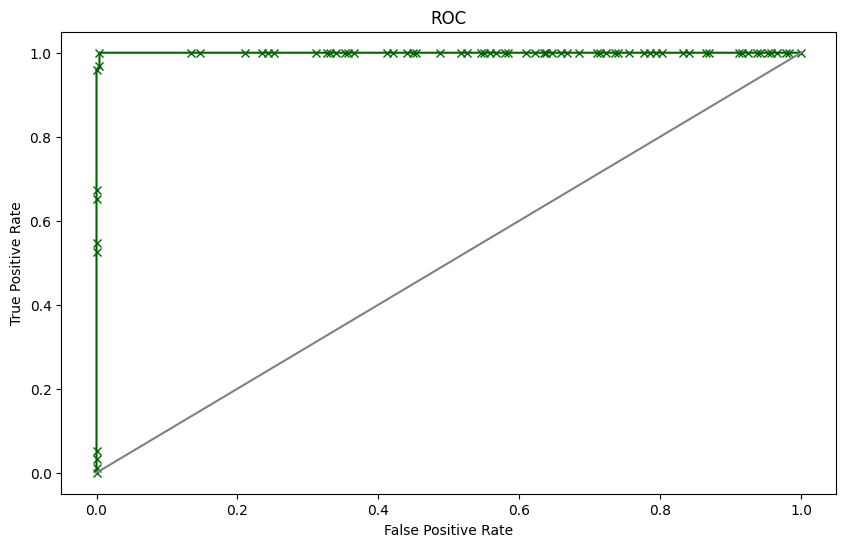

Area under Curve is 0.99984520123839


In [130]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.15805
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.12854
Feature: 3, Score: 0.09858
Feature: 4, Score: 0.04086
Feature: 5, Score: 0.04599
Feature: 6, Score: 0.06602
Feature: 7, Score: 0.16519
Feature: 8, Score: 0.04823
Feature: 9, Score: 0.05479
Feature: 10, Score: 0.03481
Feature: 11, Score: 0.01444
Feature: 12, Score: 0.04903
Feature: 13, Score: 0.02615
Feature: 14, Score: 0.06934


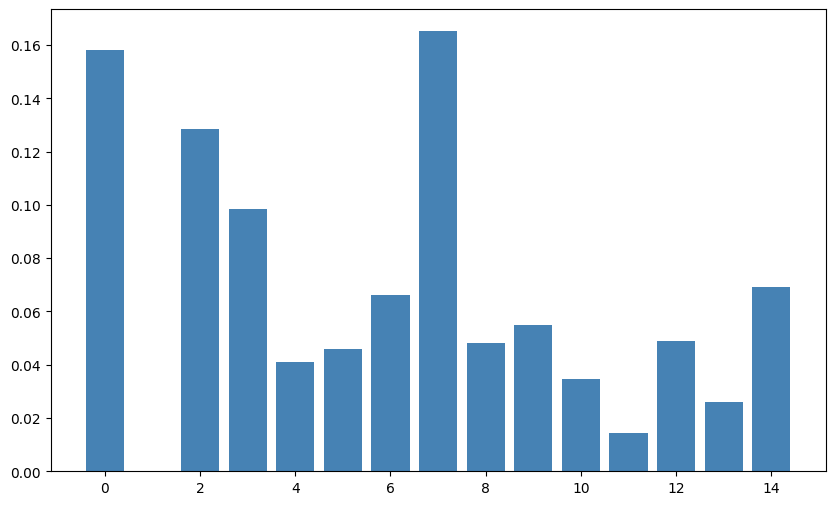

In [131]:
#get importance
importance = best_grid.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,6))
plt.bar([x for x in range(len(importance))], importance, color='steelblue')
plt.show()

In [132]:
#KNN
ac_scores = []
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[1.0,
 0.954954954954955,
 0.8558558558558559,
 0.7867867867867868,
 0.7687687687687688,
 0.7327327327327328,
 0.7297297297297297,
 0.7357357357357357,
 0.7447447447447447,
 0.7507507507507507]

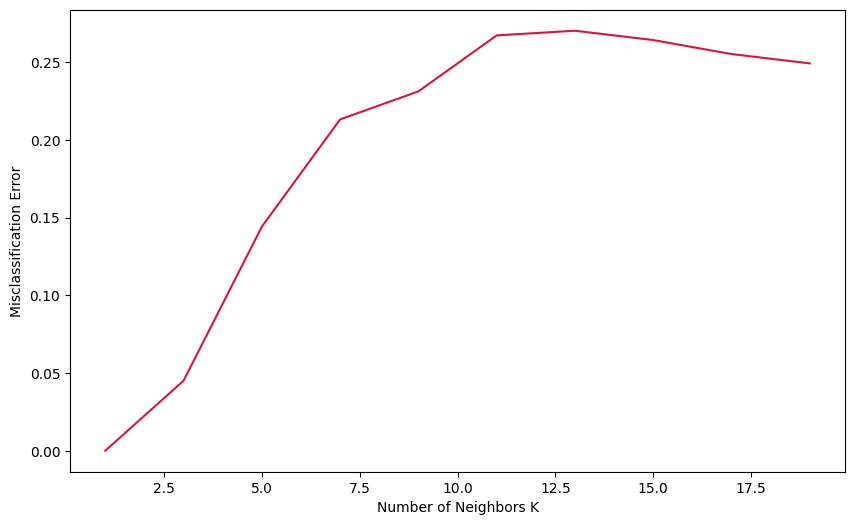

In [133]:
#plot misclassification error vs k
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),MCE,color='crimson')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [134]:
#By scree plot we see 3 is optimum number of k neighbours with accordance MCE.Therefore,building the KNN model with k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)
KNN_test_predict = KNN_model.predict(X_test)
KNN_model.score(X_train,y_train)

0.9935483870967742

In [135]:
KNN_model.score(X_test,y_test)

0.954954954954955

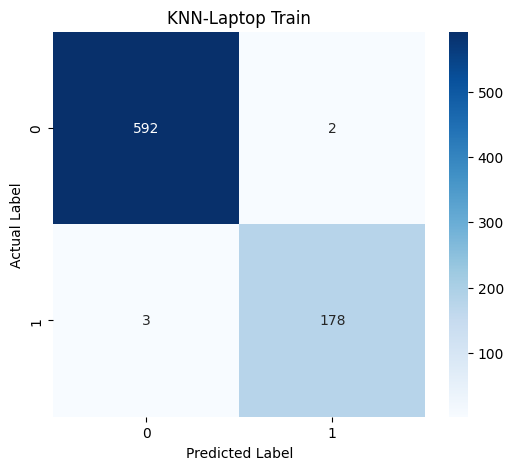

In [136]:
confusion_matrix(y_train,KNN_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Laptop Train')
plt.show()

In [137]:
print(classification_report(y_train,KNN_train_predict)) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       0.99      0.98      0.99       181

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



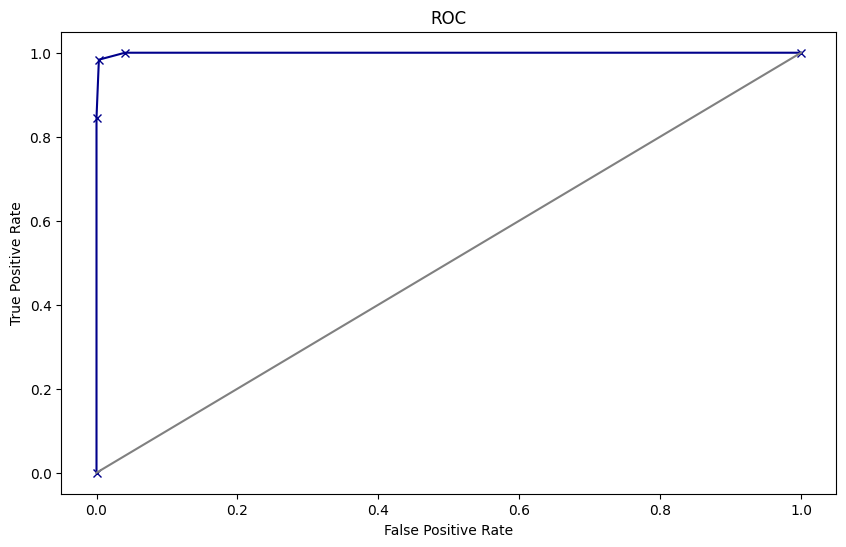

Area under Curve is 0.9994047286864967


In [138]:
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize=(10,6)) 
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkblue')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

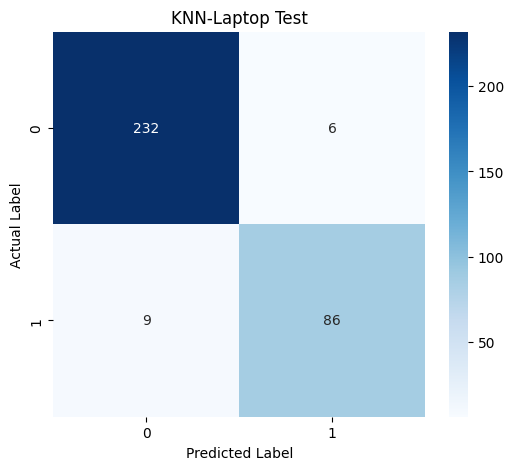

In [139]:
confusion_matrix(y_test,KNN_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Laptop Test')
plt.show()

In [140]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       238
           1       0.93      0.91      0.92        95

    accuracy                           0.95       333
   macro avg       0.95      0.94      0.94       333
weighted avg       0.95      0.95      0.95       333



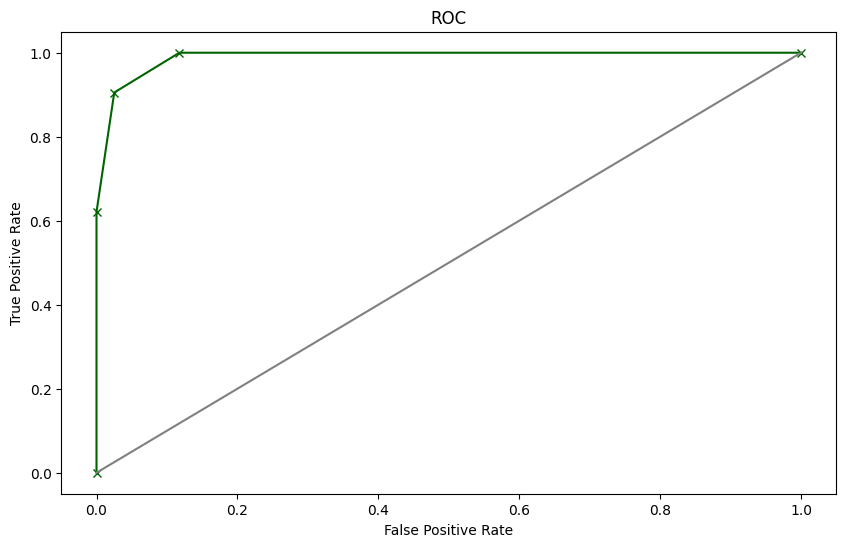

Area under Curve is 0.9896505970809376


In [141]:
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF',color='darkgreen')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

In [142]:
#Naive Bayes for laptop dataset
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [143]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)

0.832258064516129


In [144]:
y_train_predict=NB_model.predict(X_train)
NB_model=NB_model.score(X_train,y_train)
print(NB_model)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.832258064516129
[[555  39]
 [ 91  90]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       594
           1       0.70      0.50      0.58       181

    accuracy                           0.83       775
   macro avg       0.78      0.72      0.74       775
weighted avg       0.82      0.83      0.82       775



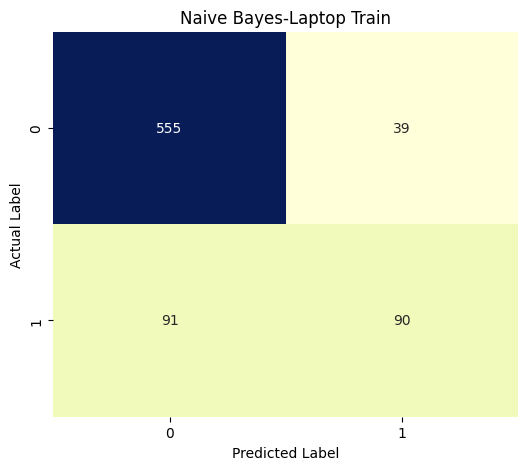

In [145]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes-Laptop Train')
plt.show()

In [146]:
NB_model=GaussianNB()
NB_model.fit(X_test, y_test)

GaussianNB()

In [147]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)

0.8108108108108109


In [148]:
y_test_predict=NB_model.predict(X_test)
NB_model=NB_model.score(X_test,y_test)
print(NB_model)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict)) 

0.8108108108108109
[[201  37]
 [ 26  69]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       238
           1       0.65      0.73      0.69        95

    accuracy                           0.81       333
   macro avg       0.77      0.79      0.78       333
weighted avg       0.82      0.81      0.81       333



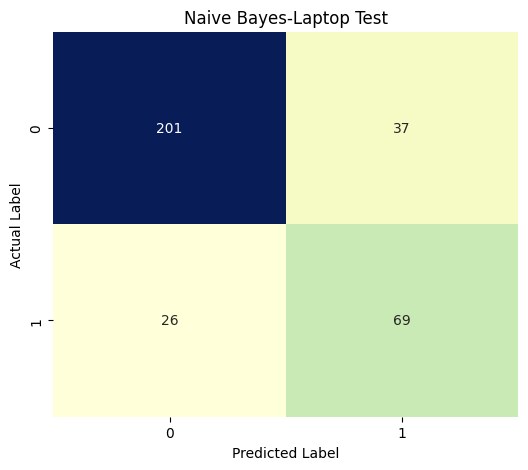

In [149]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes-Laptop Test')
plt.show()

In [150]:
#Ensemble techniques
#Bagging using hyperparameters for laptop dataset
bc = BaggingClassifier(base_estimator=rf, oob_score=True, random_state=1)
params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

{'base_estimator__max_depth': 6, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


In [151]:
rf = RandomForestClassifier(max_leaf_nodes=15, max_depth=6)                   
bc = BaggingClassifier(base_estimator=rf, n_estimators=42, random_state=1, oob_score=True)
bc.fit(X_train, y_train)
final_preds = bc.predict(X_test)
y_train_predict=bc.predict(X_train)
model_score=bc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.8529032258064516
[[594   0]
 [114  67]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       594
           1       1.00      0.37      0.54       181

    accuracy                           0.85       775
   macro avg       0.92      0.69      0.73       775
weighted avg       0.88      0.85      0.83       775



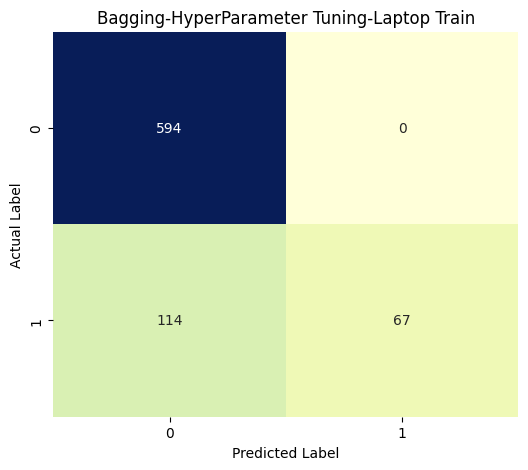

In [152]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-HyperParameter Tuning-Laptop Train')
plt.show()

In [153]:
y_test_predict=bc.predict(X_test)
model_score=bc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))  

0.8498498498498499
[[238   0]
 [ 50  45]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       238
           1       1.00      0.47      0.64        95

    accuracy                           0.85       333
   macro avg       0.91      0.74      0.77       333
weighted avg       0.88      0.85      0.83       333



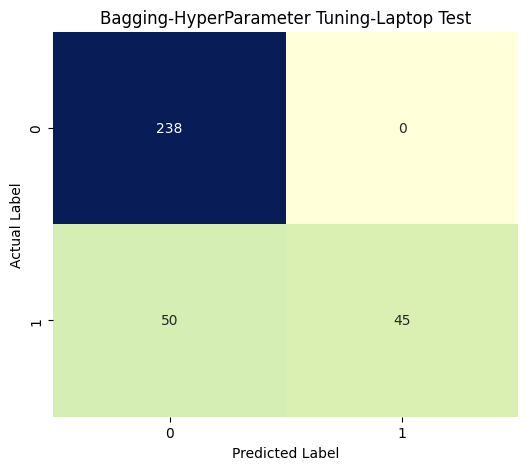

In [154]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-HyperParameter Tuning-Laptop Test')
plt.show()

In [155]:
#Bagging without grid search laptop dataset
rf=RandomForestClassifier()
Bagging_model=BaggingClassifier()
Bagging_model.fit(X_train,y_train)

BaggingClassifier()

In [156]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict)) 

0.9987096774193548
[[594   0]
 [  1 180]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      0.99      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



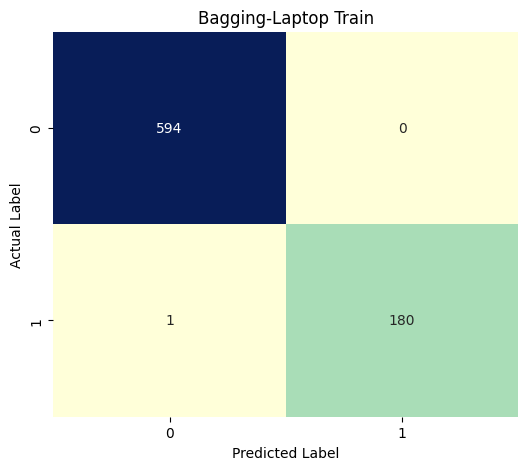

In [157]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-Laptop Train')
plt.show()

In [158]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))   

0.963963963963964
[[236   2]
 [ 10  85]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       238
           1       0.98      0.89      0.93        95

    accuracy                           0.96       333
   macro avg       0.97      0.94      0.95       333
weighted avg       0.96      0.96      0.96       333



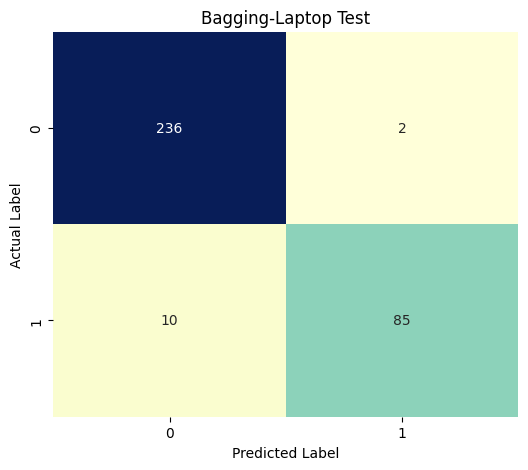

In [159]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Bagging-Laptop Test')
plt.show()

In [160]:
#ADA Boosting Model for laptop
ADB_model=AdaBoostClassifier()
ADB_model.fit(X_train,y_train)

AdaBoostClassifier()

In [161]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))  

0.9070967741935484
[[576  18]
 [ 54 127]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       594
           1       0.88      0.70      0.78       181

    accuracy                           0.91       775
   macro avg       0.90      0.84      0.86       775
weighted avg       0.91      0.91      0.90       775



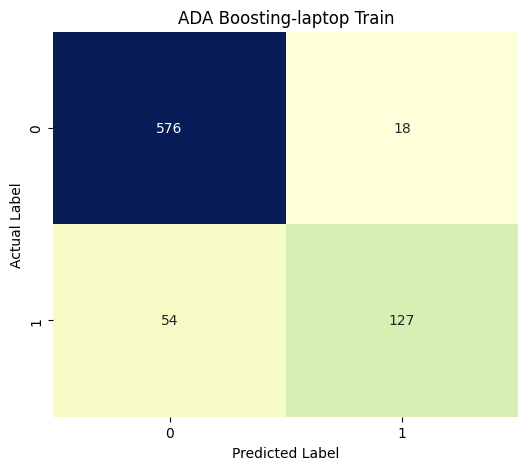

In [162]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('ADA Boosting-laptop Train')
plt.show()

In [163]:
y_test_predict = ADB_model.predict(X_test)
ADB_model_score = ADB_model.score(X_test, y_test)
print(ADB_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict)) 

0.8588588588588588
[[220  18]
 [ 29  66]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       238
           1       0.79      0.69      0.74        95

    accuracy                           0.86       333
   macro avg       0.83      0.81      0.82       333
weighted avg       0.86      0.86      0.86       333



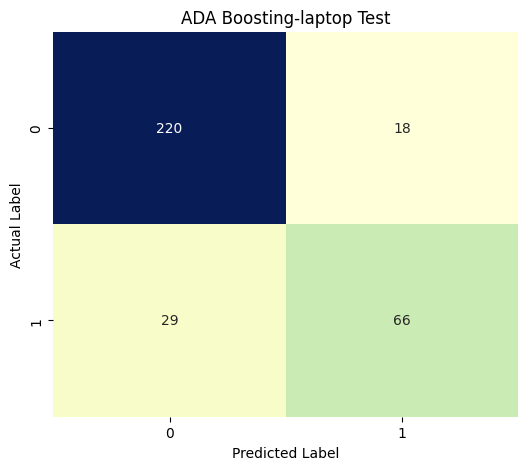

In [164]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('ADA Boosting-laptop Test')
plt.show()

In [165]:
#Gradient Boosting for laptop
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [166]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.983225806451613
[[594   0]
 [ 13 168]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       594
           1       1.00      0.93      0.96       181

    accuracy                           0.98       775
   macro avg       0.99      0.96      0.98       775
weighted avg       0.98      0.98      0.98       775



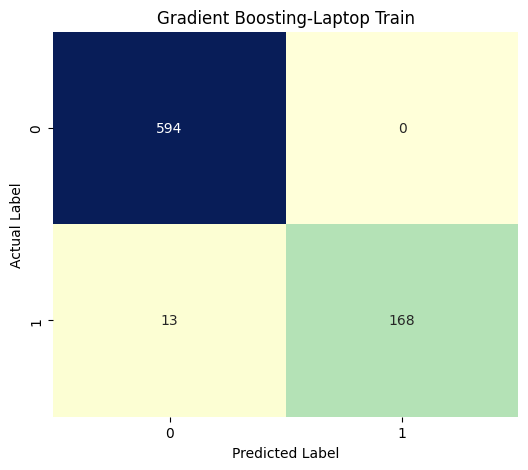

In [167]:
confusion_matrix(y_train,y_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Gradient Boosting-Laptop Train')
plt.show()

In [168]:
y_test_predict = gbc_model.predict(X_test)
gbc_model_score = gbc_model.score(X_test, y_test)
print(gbc_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict)) 

0.9579579579579579
[[236   2]
 [ 12  83]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       238
           1       0.98      0.87      0.92        95

    accuracy                           0.96       333
   macro avg       0.96      0.93      0.95       333
weighted avg       0.96      0.96      0.96       333



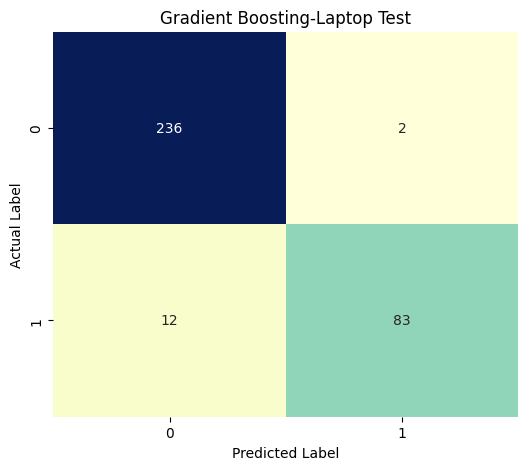

In [169]:
confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Gradient Boosting-Laptop Test')
plt.show()

In [170]:
#Extreme Gradient Boosting Machine(XG-BOOST)
clfXGB=xgb.XGBClassifier()
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

1.0


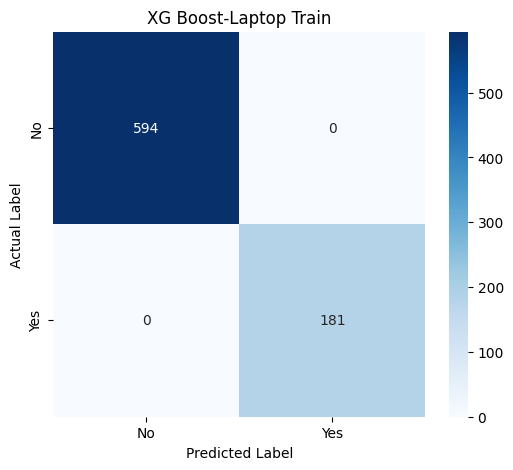

In [171]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-Laptop Train')
plt.show()

In [172]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

1.0
[[594   0]
 [  0 181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



0.984984984984985


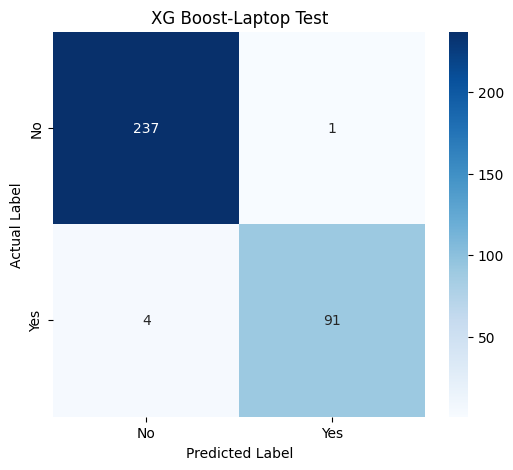

In [173]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-Laptop Test')
plt.show()

In [174]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01,max_depth=9)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.984984984984985
[[237   1]
 [  4  91]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       0.99      0.96      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.98      0.98       333
weighted avg       0.99      0.98      0.98       333



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 1.000


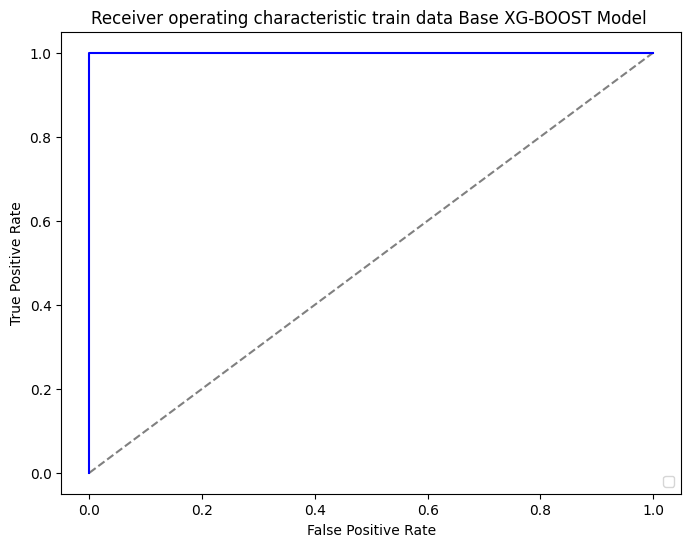

In [175]:
#predict probabilities
probs = clfXGB.predict_proba(X_train)
probs = probs[:, 1]
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(train_fpr, train_tpr,color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.999


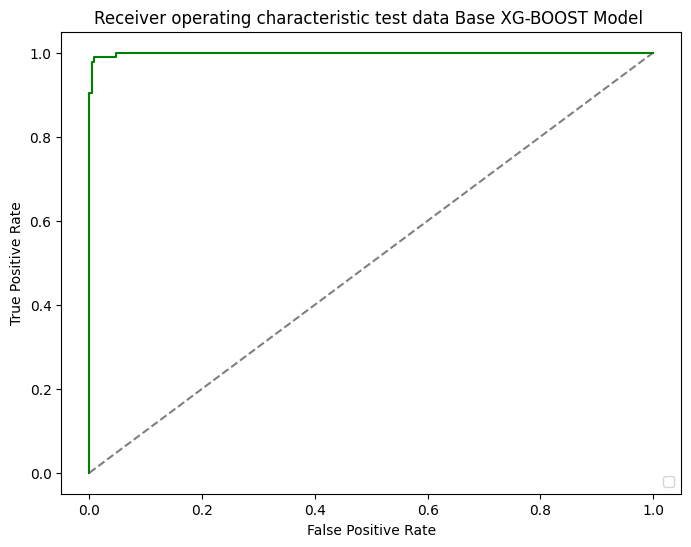

In [176]:
#predict probabilities
probs = clfXGB.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(test_fpr, test_tpr,color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data Base XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

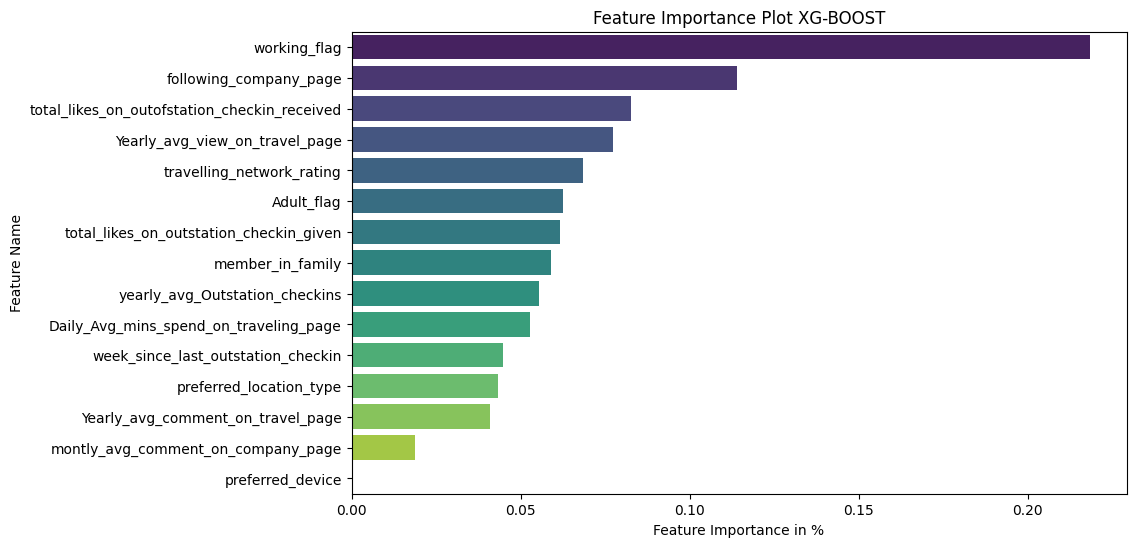

In [177]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6)) 
sns.barplot(x=x[0], y=x.index, palette='viridis')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG-BOOST')
plt.show()

In [178]:
#XG boost After hyperparameter Tune model 1
clfXGB=xgb.XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=5)
clfXGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9961290322580645


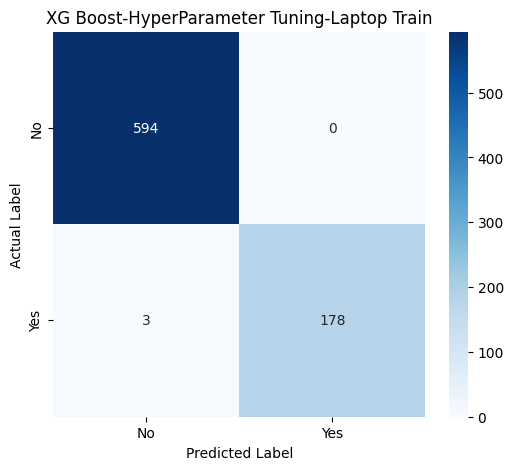

In [179]:
y_predict = clfXGB.predict(X_train)
print(clfXGB.score(X_train, y_train))
cm=metrics.confusion_matrix(y_train, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))  
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-HyperParameter Tuning-Laptop Train')
plt.show()

In [180]:
y_pred=clfXGB.predict(X_train)
model_scoreXGB=clfXGB.score(X_train,y_train)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_train,y_pred))
print(metrics.classification_report(y_train, y_pred))

0.9961290322580645
[[594   0]
 [  3 178]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       1.00      0.98      0.99       181

    accuracy                           1.00       775
   macro avg       1.00      0.99      0.99       775
weighted avg       1.00      1.00      1.00       775



0.972972972972973


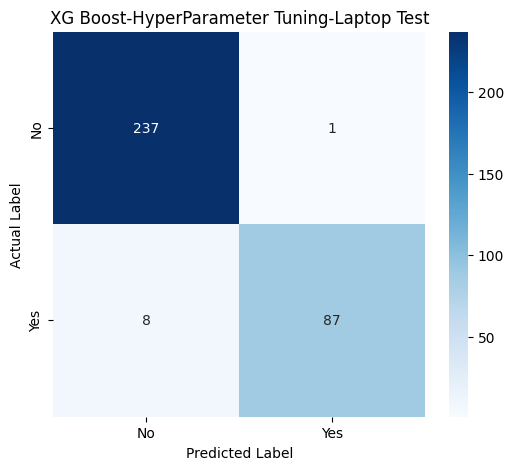

In [181]:
y_predict = clfXGB.predict(X_test)
print(clfXGB.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]], columns = [i for i in ["No","Yes"]])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('XG Boost-HyperParameter Tuning-Laptop Test')
plt.show()

In [182]:
#clfXGB=xgb.XGBClassifier(n_estimators=1000,learning_rate=0.01,max_depth=9)
y_pred=clfXGB.predict(X_test)
model_scoreXGB=clfXGB.score(X_test,y_test)
print(model_scoreXGB)
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

0.972972972972973
[[237   1]
 [  8  87]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       238
           1       0.99      0.92      0.95        95

    accuracy                           0.97       333
   macro avg       0.98      0.96      0.97       333
weighted avg       0.97      0.97      0.97       333



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 1.000


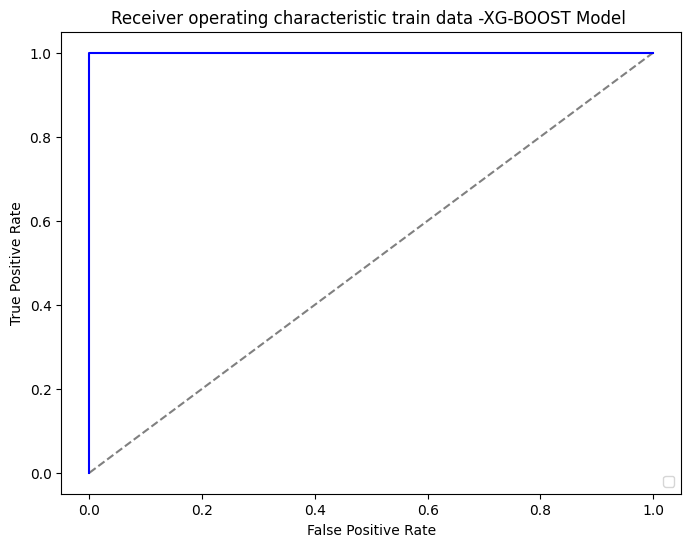

In [183]:
#predict probabilities
probs = clfXGB.predict_proba(X_train)
probs = probs[:, 1]
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(train_fpr, train_tpr,color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XG-BOOST Model ')
plt.legend(loc="lower right")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC: 0.997


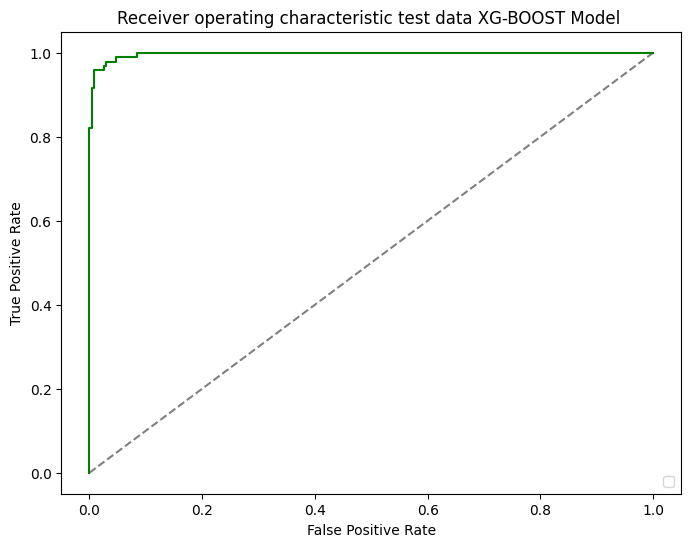

In [184]:
#predict probabilities
probs = clfXGB.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--',color='gray')
#plot ROC curve for the model
plt.plot(test_fpr, test_tpr,color='green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data XG-BOOST Model ')
plt.legend(loc="lower right")
plt.show()

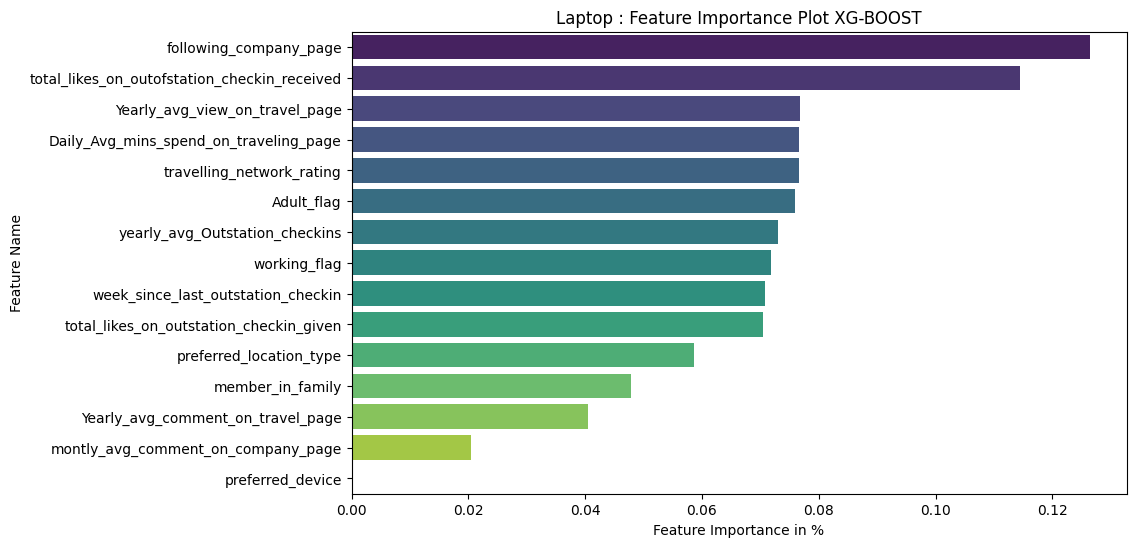

In [185]:
x=pd.DataFrame(clfXGB.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=x[0], y=x.index, palette='viridis')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Laptop : Feature Importance Plot XG-BOOST')
plt.show()

In [186]:
#SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1188, 15)

In [187]:
#LOGIT
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [188]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.6784511784511784
[[376 218]
 [164 430]]
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       594
           1       0.66      0.72      0.69       594

    accuracy                           0.68      1188
   macro avg       0.68      0.68      0.68      1188
weighted avg       0.68      0.68      0.68      1188



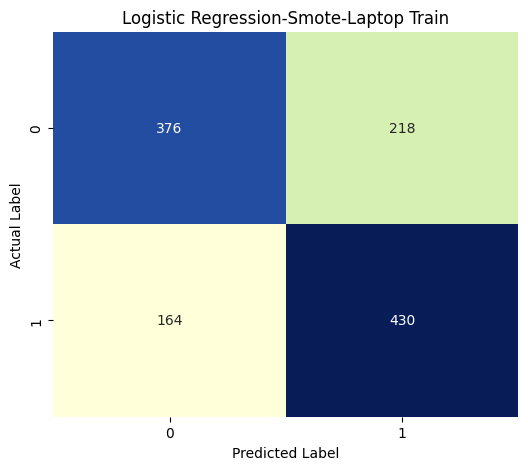

In [189]:
confusion_matrix(y_train_res, smote_log_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, smote_log_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Smote-Laptop Train')
plt.show()

In [190]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.6816816816816816
[[152  86]
 [ 20  75]]
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       238
           1       0.47      0.79      0.59        95

    accuracy                           0.68       333
   macro avg       0.67      0.71      0.66       333
weighted avg       0.76      0.68      0.70       333



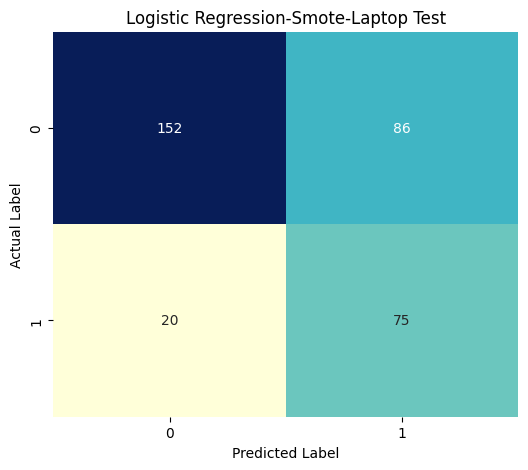

In [191]:
confusion_matrix(y_test, smote_log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, smote_log_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression-Smote-Laptop Test')
plt.show()

In [192]:
#LDA
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [193]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.6784511784511784
[[450 144]
 [156 438]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       594
           1       0.75      0.74      0.74       594

    accuracy                           0.75      1188
   macro avg       0.75      0.75      0.75      1188
weighted avg       0.75      0.75      0.75      1188



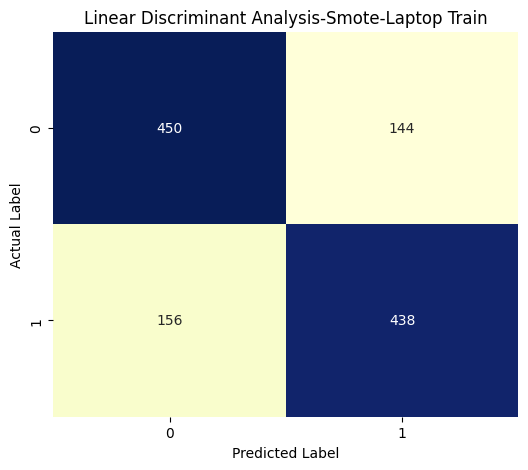

In [194]:
confusion_matrix(y_train_res, smote_lda_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, smote_lda_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Smote-Laptop Train')
plt.show()

In [195]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.7387387387387387
[[172  66]
 [ 21  74]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.80       238
           1       0.53      0.78      0.63        95

    accuracy                           0.74       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.79      0.74      0.75       333



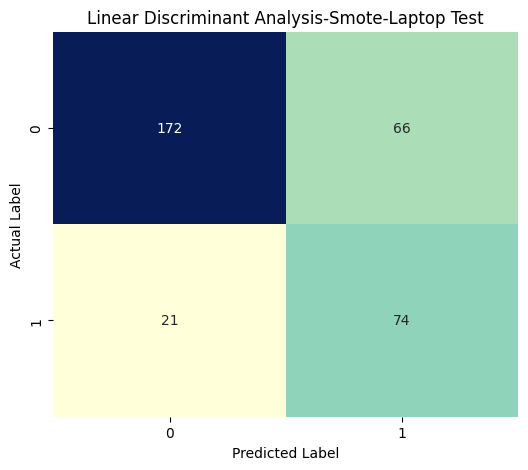

In [196]:
confusion_matrix(y_test, smote_lda_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, smote_lda_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Linear Discriminant Analysis-Smote-Laptop Test')
plt.show()

In [197]:
#KNN
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [198]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9882154882154882
[[591   3]
 [ 11 583]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       594
           1       0.99      0.98      0.99       594

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188



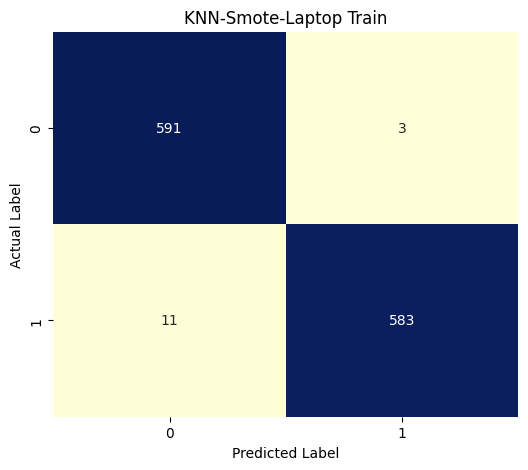

In [199]:
confusion_matrix(y_train_res, Smote_KNN_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, Smote_KNN_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Smote-Laptop Train')
plt.show()

In [200]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.963963963963964
[[229   9]
 [  3  92]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       238
           1       0.91      0.97      0.94        95

    accuracy                           0.96       333
   macro avg       0.95      0.97      0.96       333
weighted avg       0.97      0.96      0.96       333



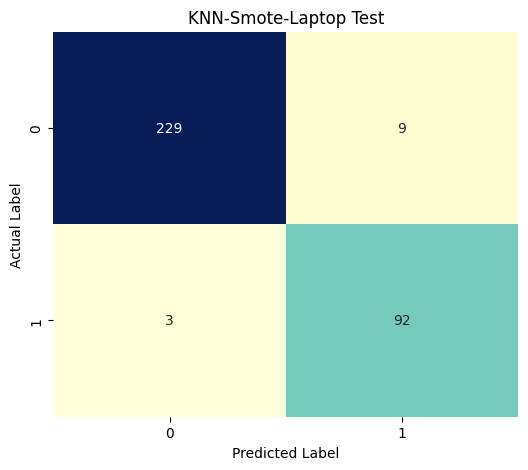

In [201]:
confusion_matrix(y_test, smote_log_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, smote_log_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN-Smote-Laptop Test')
plt.show()

In [202]:
#RF
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[594   0]
 [  0 594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



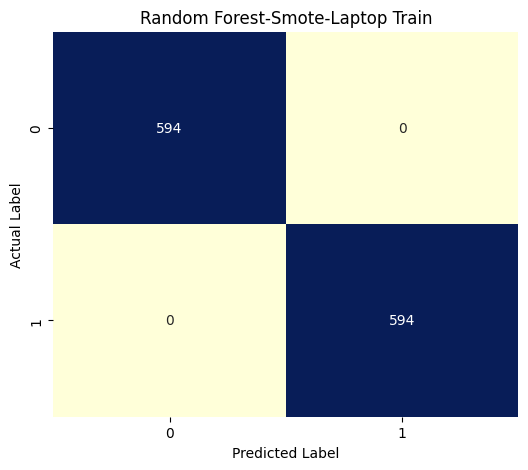

In [203]:
confusion_matrix(y_train_res, Smote_RF_train_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_train_res, Smote_RF_train_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-Smote-Laptop Train')
plt.show()

In [204]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.9819819819819819
[[238   0]
 [  6  89]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



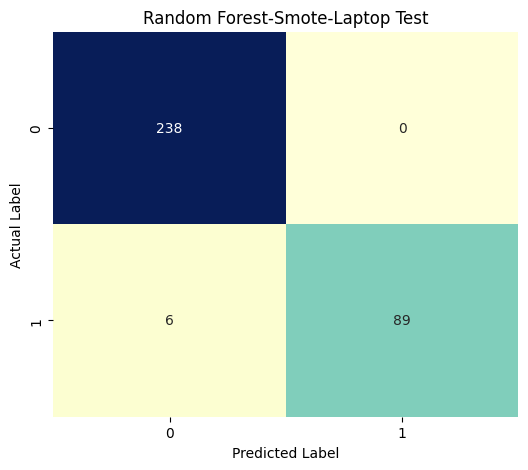

In [205]:
confusion_matrix(y_test, Smote_RF_test_predict)
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, Smote_RF_test_predict),annot=True, fmt='d',cbar=False, cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest-Smote-Laptop Test')
plt.show()